In [116]:
from larlib import *

In [131]:
def HALFSPHERE(radius):
  """
  >>> (SPHERE(1)([8,8])).box()
  Box([-1.0, -1.0, -1.0], [1.0, 1.0, 1.0])
  >>> VIEW(SPHERE(1)([16,16]))
  """
  def SPHERE0(subds):
    N , M = subds
    domain = POWER([INTERVALS(PI/2)(N),INTERVALS(PI*2)(M)])
    fx  = lambda p: radius * math.cos(p[0]) * math.sin(p[1])
    fy  = lambda p: radius * math.cos(p[0]) * math.cos(p[1])
    fz  = lambda p: radius * math.sin(p[0]) 
    ret = JOIN(MAP([fx, fy, fz])(domain))
    return ret
  return SPHERE0

def QUARTERSPHERE(radius):
  """
  >>> (SPHERE(1)([8,8])).box()
  Box([-1.0, -1.0, -1.0], [1.0, 1.0, 1.0])
  >>> VIEW(SPHERE(1)([16,16]))
  """
  def SPHERE0(subds):
    N , M = subds
    domain = POWER([INTERVALS(PI/2)(N),INTERVALS(PI)(M)])
    fx  = lambda p: radius * math.cos(p[0]) * math.sin(p[1])
    fy  = lambda p: radius * math.cos(p[0]) * math.cos(p[1])
    fz  = lambda p: radius * math.sin(p[0]) 
    ret = JOIN(MAP([fx, fy, fz])(domain))
    return ret
  return SPHERE0

def EIGHTSPHERE(radius):
  """
  >>> (SPHERE(1)([8,8])).box()
  Box([-1.0, -1.0, -1.0], [1.0, 1.0, 1.0])
  >>> VIEW(SPHERE(1)([16,16]))
  """
  def SPHERE0(subds):
    N , M = subds
    domain = POWER([INTERVALS(PI/2)(N),INTERVALS(PI/2)(M)])
    fx  = lambda p: radius * math.cos(p[0]) * math.sin(p[1])
    fy  = lambda p: radius * math.cos(p[0]) * math.cos(p[1])
    fz  = lambda p: radius * math.sin(p[0]) 
    ret = JOIN(MAP([fx, fy, fz])(domain))
    verts=[[0,0,0]]
    cells=[[1]]
    pols=[]
    center=MKPOL([verts,cells,pols])
    return JOIN([ret, center])
  return SPHERE0

def HALFCIRCUMFERENCE(R):
    return lambda N: MAP(lambda p: [R*math.cos(p[0]),R*math.sin(p[0]) ])(INTERVALS(PI)(N))

def NTHCIRCLE(R,n):
    """
    Ritorna 1/n di un cerchio
    """
    def CIRCLE0(subs):
        N , M = subs
        domain= POWER([INTERVALS(2*PI/n)(N), INTERVALS(R)(M)])
        fun=lambda p: [p[1]*math.cos(p[0]),p[1]*math.sin(p[0])]
        return MAP(fun)(domain)
    return CIRCLE0

def NTHRING(args):
    """
    Ritorna 1/n di un anello
    """
    R1, R2, n = args
    return DIFFERENCE([NTHCIRCLE(R1,n)([42,42]), NTHCIRCLE(R2,n)([42,42])])

In [132]:
VIEW(EIGHTSPHERE(1)([42,42]))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f56c4d67b10> >

In [133]:
def edges(h,l,o):
    """
    Restituisce un parallelepipedo di base triangolare.
    h: altezza. Se 0 la figura collassa su un triangolo
    o: orientamento del triangolo. Positivo in un verso negativo nell'altro
    """
    verts=[[0,0],[l,0],[0,l]]
    cells=[[1,2,3]]
    pols=[]
    temp=MKPOL([verts,cells,pols])
    if o<0:
        temp=R([1,2])(0.75*PI)(T(2)(-l)(temp))
    else:
        temp=R([1,2])(-0.75*PI)(T(1)(-l)(temp))
    return PROD([temp,QUOTE([h])])

def base(h):
    verts=[[0,0],[10,0],[0,10]]
    cells=[[1,2,3]]
    pols=[]
    return PROD([MKPOL([verts,cells,pols]),QUOTE([h])])

def wall(h,k):
    """
    Ritorna un muro con un'apertura per una cupola.
    h: altezza del muro
    k: altezza dell'apertura fino al centro della circonferenza
    """
    verts=[[10,0],[9.5,0],[0,10],[0,9.5]]
    cells=[[1,2,3,4]]
    pols=[]
    full=PROD([MKPOL([verts,cells,pols]),QUOTE([h])])
    actual=DIFFERENCE([full,hole(k)])
    return actual

def hole(h):
    tmp=CIRCLE(4)([64,64])
    tmp=T(3)(h+4)(R([1,3])(-PI/2)(PROD([tmp,QUOTE([20])])))
    verts=[[0,-4],[0,4],[20,-4],[20,4]]
    cells=[[1,2,3,4]]
    pols=[]
    tmp2=MKPOL([verts,cells,pols])
    return R([1,2])(0.25*PI)(JOIN([tmp,tmp2]))

In [61]:
# Questo è il "piano terra" dell'immagine sotto
myv=STRUCT([base(0.5), wall(16,5),
            T(2)(9.5)(edges(16,1,-1)), T(2)(6)(edges(16,0.5,-1)),
            T(1)(9.5)(edges(16,1,1)), T(1)(6)(edges(16,0.5,1))])
final=STRUCT([myv, R([1,2])(0.5*PI), myv, R([1,2])(0.5*PI), myv, R([1,2])(0.5*PI), myv])
VIEW(final)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f56c4e3f8a0> >

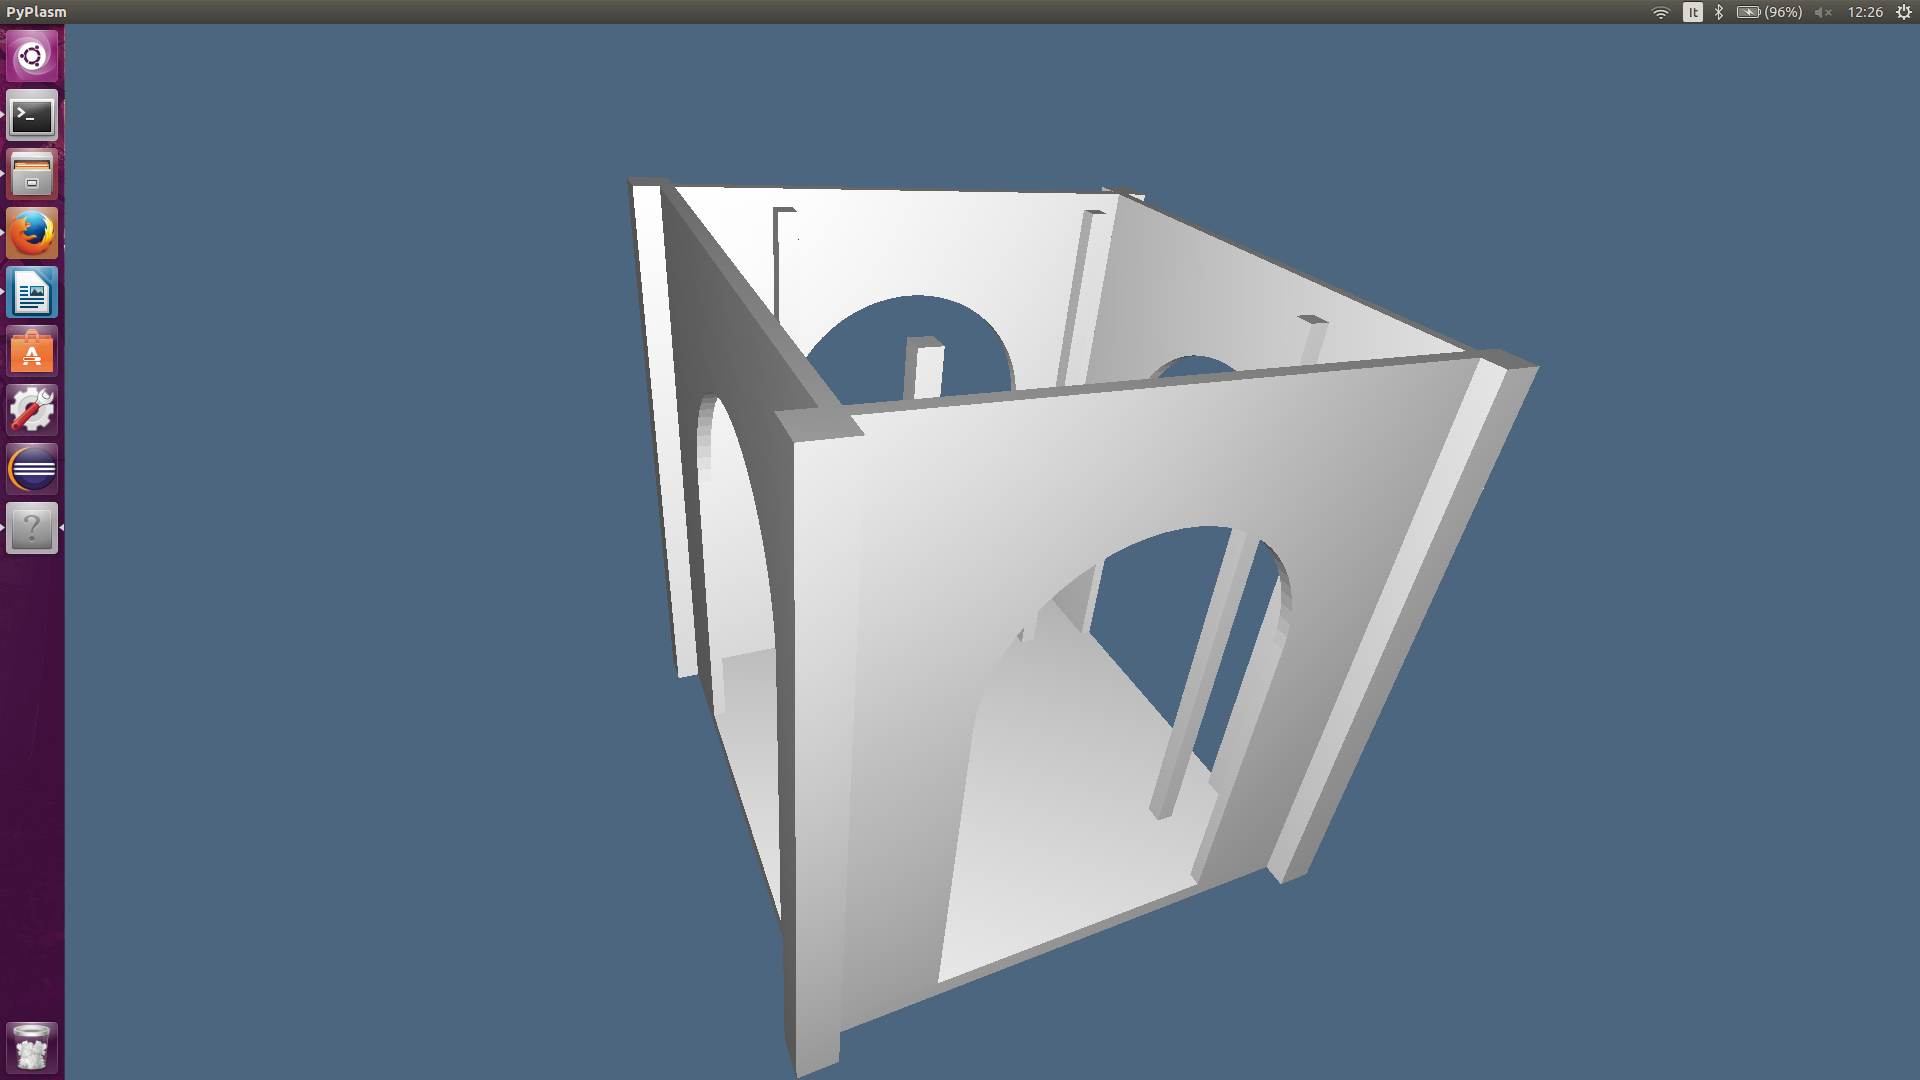

In [111]:
def baseWithHole(h):
    verts=[[0,0],[10,0],[0,10]]
    cells=[[1,2,3]]
    pols=[]
    tmp=MKPOL([verts,cells,pols])
    base=DIFFERENCE([tmp,CIRCLE(6)([42,42])])
    return PROD([base,QUOTE([h])])

In [134]:
tmp=PROD([NTHRING([6.5,6,4]),QUOTE([5])])
cupola=DIFFERENCE([EIGHTSPHERE(6.5)([42,42]), EIGHTSPHERE(6)([42,42])])
myv=STRUCT([baseWithHole(0.5), tmp, T(3)(5)(cupola)])
VIEW(myv)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f56c4d676f0> >